## 1. A Simple implementation of ANN for MNIST

![](elephant.jpg)

In [2]:
import random
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model # both used for defining  the networks
from keras.layers.core import Dense, Dropout, Activation # defining the layers
from keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from keras import backend as K
# IMAGE ORDERING: Tensorflow(64,64,3), Theano(3,64,64)
K.set_image_dim_ordering('tf') # always check you are using the correct image dimension
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Data Preprocessing 

In [3]:
# load the mnist datasets (auto or pre dowloaded in ./keras)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# ptint the data shape
print(X_train.shape, y_train.shape)
print(X_train.shape, y_test.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28) (10000,)


In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples') 

60000 train samples
10000 test samples


In [5]:
batch_size = 128
nb_classes = 10
nb_epoch = 10
# convert class vectors to binary class matrices for softmax layer
Y_train  = keras.utils.np_utils.to_categorical(y_train, nb_classes)
Y_test   = keras.utils.np_utils.to_categorical(y_test, nb_classes)
# for example the one-hot encoding for number 6 is [0,0,0,0,0,0,1,0,0,0,0]
print(Y_train.shape)

(60000, 10)


### Model definition 

In [6]:
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

### Model compilation

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',#RMSprop()
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train,Y_train,
                    batch_size = batch_size,epochs=nb_epoch,
                    verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.2480 - acc: 0.9230 - val_loss: 0.1020 - val_acc: 0.9696
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.1037 - acc: 0.9692 - val_loss: 0.0793 - val_acc: 0.9758
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.0750 - acc: 0.9774 - val_loss: 0.0935 - val_acc: 0.9734
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.0626 - acc: 0.9813 - val_loss: 0.0854 - val_acc: 0.9781
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.0506 - acc: 0.9849 - val_loss: 0.0886 - val_acc: 0.9783
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.0445 - acc: 0.9862 - val_loss: 0.0746 - val_acc: 0.9820
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.0388 - acc: 0.9881 - val_loss: 0.0814 - val_acc: 0.9818
Epoch 8/10
60000/60000 [==============================] - 1s 

In [10]:
history.params # very useful in paper

{'batch_size': 128,
 'do_validation': True,
 'epochs': 10,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 60000,
 'verbose': 1}

In [11]:
history.history # a dictionary in python:loss-acc-val_acc-val_loss

{'acc': [0.9229833333651225,
  0.96918333336512252,
  0.97735000006357831,
  0.98125000006357832,
  0.98488333339691159,
  0.98623333339691166,
  0.98814999999999997,
  0.98953333333333338,
  0.99081666666666668,
  0.99130000006357832],
 'loss': [0.24796319204966227,
  0.10373863806327184,
  0.07497846727073193,
  0.062563803289830688,
  0.050574125162263714,
  0.044493537303805349,
  0.038753298271447419,
  0.033807868295147397,
  0.030844173294740419,
  0.028569058305552852],
 'val_acc': [0.96960000000000002,
  0.9758,
  0.97340000000000004,
  0.97809999999999997,
  0.97829999999999995,
  0.98199999999999998,
  0.98180000000000001,
  0.9839,
  0.98129999999999995,
  0.98209999999999997],
 'val_loss': [0.10197166910916566,
  0.079328792314976457,
  0.093479754989407957,
  0.085367925584316259,
  0.088614144746784584,
  0.074631284947307724,
  0.081413470945091104,
  0.080776075378924728,
  0.087265062270388077,
  0.091262417124013881]}

### Evaluation and Prediction

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test acccuracy:", score[1])

Test loss: 0.0912624169297
Test acccuracy: 0.9821


### Now let's predict one single sample

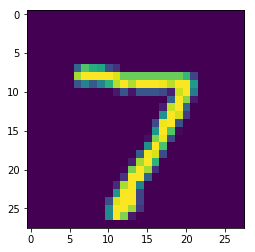

In [13]:
X_test_0 = X_test[0,:].reshape(1,784)
Y_test_0 = Y_test[0,:]
plt.imshow(X_test_0.reshape((28,28)))

In [17]:
pred = model.predict(X_test_0[:])
print('Label of testing sample: ',np.argmax(Y_test_0))
print('Output of the softmax layer', pred[0])
print('Network prediction:', np.argmax(pred[0]))# for the output is a probability distribution

Label of testing sample:  7
Output of the softmax layer [  2.96559541e-23   2.01053146e-14   2.80289148e-14   4.17422580e-14
   1.41108353e-20   6.30270863e-17   7.78391670e-29   1.00000000e+00
   1.48532998e-16   4.53321652e-13]
Network prediction: 7
